# Formula1 Analysis

##  Introduction
Formula1 is one of most popular race that is wached in the motorsport world. The sport features the most technically advanced cars in the world.

Interested in the evolution of technology, the world of motorsport has piqued my interest in recent years. Formua 1 has a huge history of car evolution and technology breakthroughs. Having the single goal to be the fastest car on the track, constructors develop innovative ways to improve their cars each year. 

Being a recent F1 fan I would like to know:

At what position will a racer finish when starting 1st in the monacoGP?

## Data Cleanig

From an API the database tables in CSV format have been imported.
Let's start by looking, assigning columbs and merge our datasets.

In [143]:
import seaborn as sns 
import pandas as pd 
import matplotlib.pyplot as plt 
import plotly.express as px
import numpy as np
import seaborn as sb

df1 = pd.read_csv(r'C:\Users\nirva\Desktop\Data Learning\Final assignment\f1db_csv\results.csv')
df2 = pd.read_csv(r'C:\Users\nirva\Desktop\Data Learning\Final assignment\f1db_csv\races.csv')
df3 = pd.read_csv(r'C:\Users\nirva\Desktop\Data Learning\Final assignment\f1db_csv\drivers.csv')
df4 = pd.read_csv(r'C:\Users\nirva\Desktop\Data Learning\Final assignment\f1db_csv\circuits.csv')
constructors = pd.read_csv(r'C:\Users\nirva\Desktop\Data Learning\Final assignment\f1db_csv\constructors.csv')
df1.head()



,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [144]:
# assigning merging datasets
df5 = pd.merge(df1, df3, on = 'driverId')
df6 = pd.merge(df2, df4, on = 'circuitId')
df7 = pd.merge(df5, df6, on = 'raceId')
df7 = pd.merge(df7, constructors, on = 'constructorId')

# subseting needed columbs 
list(df7.columns)

#@### Take variables known before the race and use it for prediction

C:\Users\nirva\AppData\Local\Temp/ipykernel_34200/1625516695.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'url_x'} in the result is deprecated and will raise a MergeError in a future version.
  df7 = pd.merge(df7, constructors, on = 'constructorId')


['resultId',
 'raceId',
 'driverId',
 'constructorId',
 'number_x',
 'grid',
 'position',
 'positionText',
 'positionOrder',
 'points',
 'laps',
 'time_x',
 'milliseconds',
 'fastestLap',
 'rank',
 'fastestLapTime',
 'fastestLapSpeed',
 'statusId',
 'driverRef',
 'number_y',
 'code',
 'forename',
 'surname',
 'dob',
 'nationality_x',
 'url_x',
 'year',
 'round',
 'circuitId',
 'name_x',
 'date',
 'time_y',
 'url_x',
 'fp1_date',
 'fp1_time',
 'fp2_date',
 'fp2_time',
 'fp3_date',
 'fp3_time',
 'quali_date',
 'quali_time',
 'sprint_date',
 'sprint_time',
 'circuitRef',
 'name_y',
 'location',
 'country',
 'lat',
 'lng',
 'alt',
 'url_y',
 'constructorRef',
 'name',
 'nationality_y',
 'url_y']

In [145]:
#filtering 
df = df7[['driverRef','circuitRef','year','grid','position','positionOrder','time_x','milliseconds', 'rank','fastestLapTime','laps','fastestLapSpeed','constructorRef']]
df = df.loc[df['circuitRef'] == 'monaco']
df.value_counts()


driverRef          circuitRef  year  grid  position  positionOrder  time_x   milliseconds  rank  fastestLapTime  laps  fastestLapSpeed  constructorRef
Changy             monaco      1959  0     \N        19             \N       \N            \N    \N              0     \N               cooper-climax     1
ocon               monaco      2018  6     6         6              +23.667  6198474       14    1:17.027        78    155.960          force_india       1
pace               monaco      1974  18    \N        24             \N       \N            \N    \N              0     \N               surtees           1
                               1973  17    \N        19             \N       \N            \N    \N              31    \N               surtees           1
                               1972  24    17        17             \N       \N            \N    \N              72    \N               march             1
                                                                     

In [146]:
#Replacing \N values 
df.time_x.replace ('\\N' ,np.nan, inplace = True )
df.milliseconds.replace ('\\N',np.nan, inplace = True )
#df.rank.replace ('\\N' ,np.nan, inplace = True )
df.fastestLapTime.replace ('\\N', np.nan , inplace = True )
df.fastestLapSpeed.replace ('\\N', np.nan , inplace = True )

In [147]:
# change datatypes
df.fastestLapSpeed = df.fastestLapSpeed.astype ( float)
#df.rank = df.rank.astype ( float )
df.milliseconds = df.milliseconds.astype ( float )

In [148]:
# reset index
df.reset_index(drop=True, inplace=True)

In [149]:
df.shape

(1624, 13)

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1624 entries, 0 to 1623
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   driverRef        1624 non-null   object 
 1   circuitRef       1624 non-null   object 
 2   year             1624 non-null   int64  
 3   grid             1624 non-null   int64  
 4   position         1624 non-null   object 
 5   positionOrder    1624 non-null   int64  
 6   time_x           332 non-null    object 
 7   milliseconds     332 non-null    float64
 8   rank             1624 non-null   object 
 9   fastestLapTime   370 non-null    object 
 10  laps             1624 non-null   int64  
 11  fastestLapSpeed  370 non-null    float64
 12  constructorRef   1624 non-null   object 
dtypes: float64(2), int64(4), object(7)
memory usage: 165.1+ KB


In [151]:
df.head(10)

,driverRef,circuitRef,year,grid,position,positionOrder,time_x,milliseconds,rank,fastestLapTime,laps,fastestLapSpeed,constructorRef
0,hamilton,monaco,2008,3,1,1,2:00:42.742,7242742.0,6,1:18.510,76,153.152,mclaren
1,kovalainen,monaco,2008,4,8,8,+33.191,7275933.0,2,1:17.282,76,155.586,mclaren
2,hamilton,monaco,2007,2,2,2,+4.095,6033424.0,2,1:15.372,78,159.528,mclaren
3,alonso,monaco,2007,1,1,1,1:40:29.329,6029329.0,1,1:15.284,78,159.715,mclaren
4,hamilton,monaco,2009,19,12,12,NaN,NaN,8,1:15.706,77,158.824,mclaren
5,kovalainen,monaco,2009,7,\N,16,NaN,NaN,6,1:15.672,51,158.896,mclaren
6,hamilton,monaco,2010,5,5,5,+4.363,6617718.0,10,1:16.219,78,157.755,mclaren
7,button,monaco,2010,8,\N,23,NaN,NaN,23,2:14.285,2,89.540,mclaren
8,hamilton,monaco,2011,9,6,6,+27.210,7805583.0,5,1:17.847,78,154.456,mclaren
9,button,monaco,2011,2,3,3,+2.378,7780751.0,3,1:16.463,78,157.252,mclaren


## Exploratory data analysis

In [152]:
# GP winners
driver_winner = df.loc[df['positionOrder']== 1].groupby('driverRef')['positionOrder'].count().sort_values(ascending=False).to_frame().reset_index()
#  top 10 GP winners
top10= driver_winner
top10.head(10)

,driverRef,positionOrder
0,senna,6
1,hill,5
2,michael_schumacher,5
3,prost,4
4,moss,3
5,stewart,3
6,rosberg,3
7,hamilton,3
8,lauda,2
9,vettel,2


Lets first have a look on the top 10 win during the monaco grandprix. Just for curiosity, it's intresting to undersstand Wich diver had the most chace of wining in a futher study. 

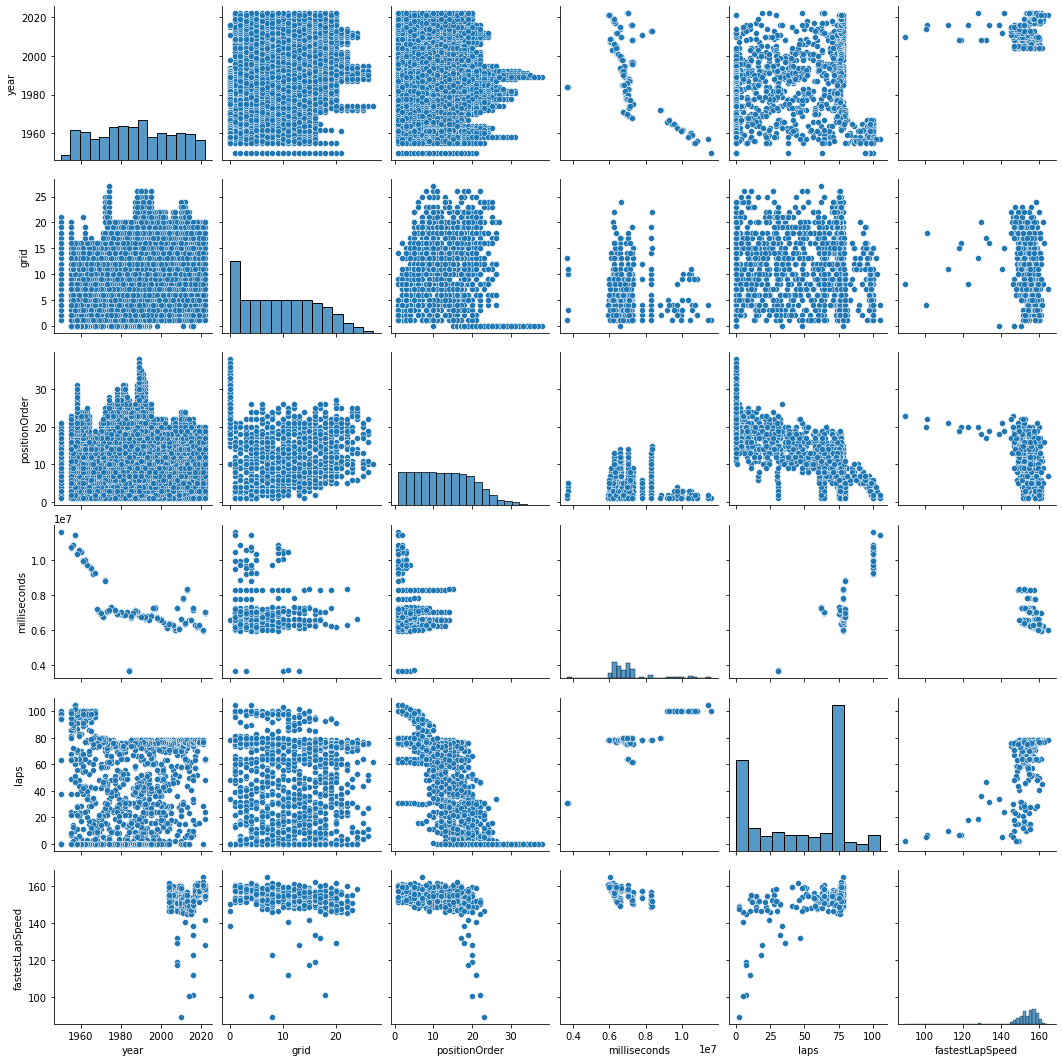

In [153]:
sns.pairplot(df)
plt.show()

C:\Users\nirva\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


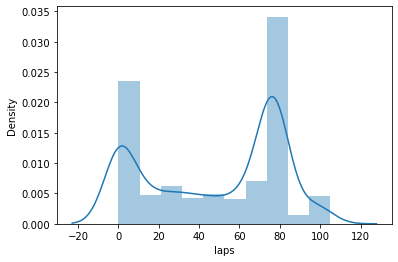

C:\Users\nirva\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


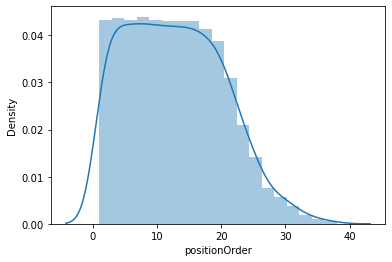

In [157]:
sns.distplot(df['laps'])
plt.show()
sns.distplot(df['positionOrder'])
plt.show()

In [154]:
# correlation matrix of the numerical variables
corr = df.corr()
corr

,year,grid,positionOrder,milliseconds,laps,fastestLapSpeed
year,1.000000,0.204559,-0.031954,-0.589810,0.208910,0.048255
grid,0.204559,1.000000,-0.056679,-0.058376,0.207273,-0.186452
positionOrder,-0.031954,-0.056679,1.000000,-0.177533,-0.830523,-0.431806
milliseconds,-0.589810,-0.058376,-0.177533,1.000000,0.775668,-0.486800
laps,0.208910,0.207273,-0.830523,0.775668,1.000000,0.556601
fastestLapSpeed,0.048255,-0.186452,-0.431806,-0.486800,0.556601,1.000000


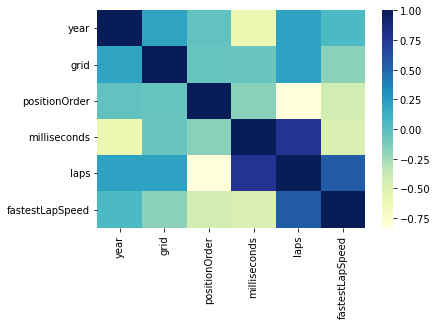

In [155]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="YlGnBu") #the last two arguments set the column names
plt.show()

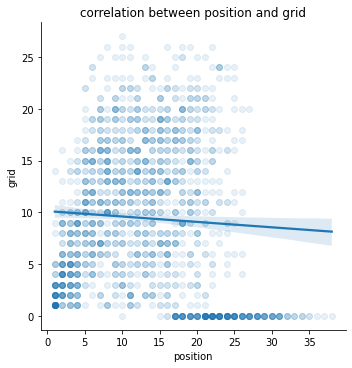

In [162]:
sns.lmplot(x='positionOrder', y='grid', fit_reg=True, data=df, scatter_kws={'alpha':0.1}) #fit_reg=False leaves out the regression line; see below
plt.xlabel('position') #use matplotlib to refine Seaborn plot
plt.ylabel('grid')
plt.title('correlation between position and grid')
plt.show()

## Predictive models

## Conclusion

The objective of the study was to predict the final position of a driver from the start of the grid.

Knowing that there is many factors in place to have a good prediction, after working with the data and analysing it I didn’t find any correlation with the variables that were in my disposal.
 
Unfortunately after many research on technical details about a car during a race like tire temperature, type of tires, weather, Engine, Weight of a car… couldn’t be found

My analysis of this dataset is unfortunately unachieved.


## References

Datasets:
http://ergast.com/mrd/db/#csv
